In [1]:
import pandas as pd
filename = 'stat_142801.xls'

/home/pi/.local/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [7]:
df = pd.read_excel(filename, skiprows=2, nrows=2, index_col=0) #

In [8]:
df.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [9]:
df.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'}, inplace=True) #

In [11]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [13]:
df = df.T

## draw graph

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
matplotlib.rcParams['font.family'] = 'UnDotum' # 리눅스 돋움체 설정
matplotlib.rcParams['font.size'] = 15 # 폰트 크기
matplotlib.rcParams['axes.unicode_minus'] = False  # - 마이너스 글꼴 오류 처리

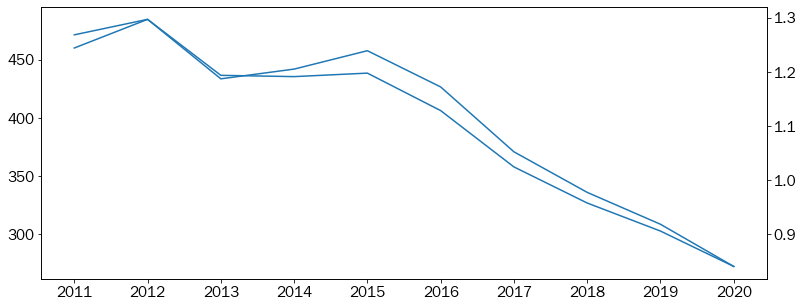

In [22]:
# 
fig, ax1 = plt.subplots(figsize=(13,5))
ax1.plot(df.index, df['출생아 수'])

ax2 = ax1.twinx() #
ax2.plot(df.index, df['합계 출산율'])

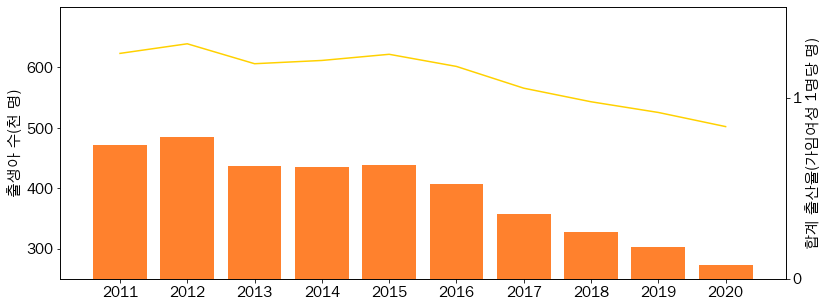

In [28]:
#
fig, ax1 = plt.subplots(figsize=(13,5))
ax1.set_ylabel('출생아 수(천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')

ax2 = ax1.twinx() #
ax2.set_ylabel('합계 출산율(가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0,1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100')

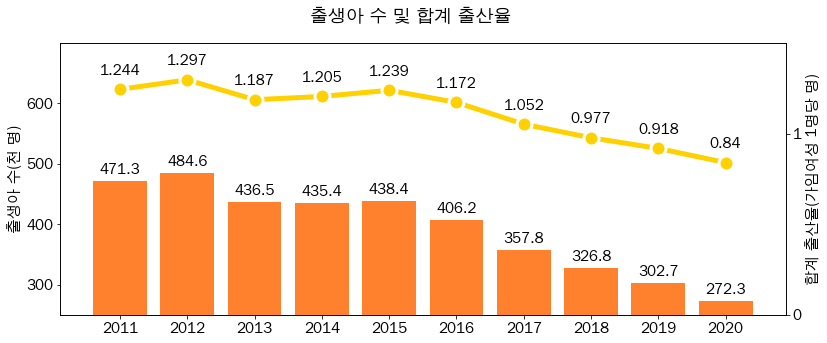

In [38]:
#
fig, ax1 = plt.subplots(figsize=(13,5))
fig.suptitle('출생아 수 및 합계 출산율')
ax1.set_ylabel('출생아 수(천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')
for idx, val in enumerate(df['출생아 수']):
    ax1.text(idx, val + 12, val, ha='center')

ax2 = ax1.twinx() #
ax2.set_ylabel('합계 출산율(가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0,1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100',marker='o', ms=15, lw=5, mec='w', mew=3)
for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val + 0.08, val, ha='center')
plt.show()